<a href="https://colab.research.google.com/github/ankitarashmi/EVAAssignments/blob/master/ThirdIteration_Seesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


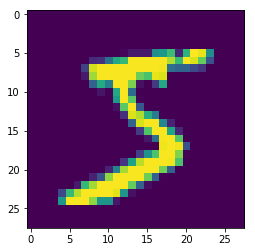

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#Normalization of Pixels


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Added Batch Normalization

1. Added Batch normalization after every convolution excpet the last one.
2. Increasing the number of Epochs from 20 to 30 for this model

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) #(26,26,12) RF:3X3
model.add(BatchNormalization())
model.add(Convolution2D(14, 3, 3, activation='relu')) #(24,24,14) RF:5X5
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu')) #(22,22,16) RF:7X7
model.add(BatchNormalization())

model.add(MaxPooling2D())
model.add(Convolution2D(12, 1, activation='relu'))  #(11,11,12) RF :7X7
model.add(BatchNormalization())

model.add(Convolution2D(14, 3,3, activation='relu')) #(9,9,14) RF:9X9
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu'))#(7,7,16) RF:13X13
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10,7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 12)        48        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 14)        1526      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 14)        56        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 16)        2032      
_________________________________________________________________
batch_normalization_4 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Accuracy Improved to  99.24
#Number of parameters:12,896


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=30,validation_data=(X_test,Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 21s 350us/step - loss: 0.1451 - acc: 0.9553 - val_loss: 0.0497 - val_acc: 0.9843
Epoch 2/30
60000/60000 [==============================] - 21s 342us/step - loss: 0.0491 - acc: 0.9849 - val_loss: 0.0434 - val_acc: 0.9856
Epoch 3/30
60000/60000 [==============================] - 20s 341us/step - loss: 0.0398 - acc: 0.9876 - val_loss: 0.0371 - val_acc: 0.9881
Epoch 4/30
60000/60000 [==============================] - 21s 348us/step - loss: 0.0329 - acc: 0.9897 - val_loss: 0.0387 - val_acc: 0.9883
Epoch 5/30
60000/60000 [==============================] - 20s 328us/step - loss: 0.0282 - acc: 0.9911 - val_loss: 0.0293 - val_acc: 0.9903
Epoch 6/30
60000/60000 [==============================] - 20s 327us/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0296 - val_acc: 0.9898
Epoch 7/30
60000/60000 [==============================] - 20s 338us/step - loss: 0.0218 - acc: 0.9928 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04465369085110979, 0.9892]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.4137986e-14 1.0199450e-15 3.8357952e-09 3.5022317e-08 3.0480218e-18
  9.4360339e-18 6.1080755e-31 1.0000000e+00 2.4515173e-12 1.7935351e-11]
 [5.9250552e-15 2.1536893e-13 1.0000000e+00 9.6459629e-17 2.7163532e-23
  2.3026589e-15 1.1406938e-13 8.8546596e-20 5.8518788e-13 2.9938948e-18]
 [5.7009319e-10 9.9999797e-01 3.1237548e-08 5.9275790e-10 1.8485400e-09
  1.6276199e-09 2.5351750e-09 1.3037791e-06 6.8179293e-07 1.7032657e-10]
 [1.0000000e+00 1.2682165e-19 2.0265246e-10 1.3566061e-13 1.9595551e-16
  1.6772422e-15 9.0452970e-09 1.3268867e-18 8.1662094e-10 3.7418983e-12]
 [1.1440360e-17 7.2161781e-16 5.0241829e-20 9.3783524e-21 1.0000000e+00
  3.0302045e-17 2.0565819e-17 1.2910765e-18 2.1053765e-17 1.5686136e-10]
 [2.0836027e-10 9.9999368e-01 4.6921964e-09 2.2620443e-10 9.0430836e-09
  5.8520605e-11 5.0808677e-11 5.5651576e-06 7.6464852e-07 1.0649316e-09]
 [1.6497646e-22 5.2466359e-17 3.5891117e-13 1.3223479e-18 9.9998391e-01
  3.6431416e-14 1.9734887e-19 1.0730355e-10 1.2183450e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f0f01d88cf8>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7f0f04ee3be0>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7f0f0269ca58>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7f0f0269c748>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7f0f01e801d0>,
 'conv2d_5': <keras.layers.convolutional.Conv2D at 0x7f0f01e80080>,
 'conv2d_6': <keras.layers.convolutional.Conv2D at 0x7f0f01e1b780>,
 'conv2d_7': <keras.layers.convolutional.Conv2D at 0x7f0f01e302e8>,
 'flatten_1': <keras.layers.core.Flatten at 0x7f0f01df0160>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x7f0f0269c630>}

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_32'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored